In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

### Data Preprocessing

In [4]:
# Checking data 
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [5]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Data description
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [7]:
# Function for checking null and duplicate data
def checkNullAndDuplicateData(dataset):
    null_features = dataset.isnull().sum() # Checking for missing value
    duplicate_data = dataset.duplicated().sum() # Checking duplicate data
    return null_features, duplicate_data

In [8]:
# Checking for missing and duplicate value
missing_data, duplicate_data = checkNullAndDuplicateData(data)
print("Missing values in each features:\n", missing_data)
print("\nDupilcate data:", duplicate_data)

Missing values in each features:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Dupilcate data: 0


In [9]:
# Checking the count occurrences of zero values in each column
for column in data.columns:
    zero_count = (data[column] == 0).sum() # Counting number of zeros
    print(f"Zeros in column '{column}' : '{zero_count}'")

Zeros in column 'step' : '0'
Zeros in column 'type' : '0'
Zeros in column 'amount' : '16'
Zeros in column 'nameOrig' : '0'
Zeros in column 'oldbalanceOrg' : '2102449'
Zeros in column 'newbalanceOrig' : '3609566'
Zeros in column 'nameDest' : '0'
Zeros in column 'oldbalanceDest' : '2704388'
Zeros in column 'newbalanceDest' : '2439433'
Zeros in column 'isFraud' : '6354407'
Zeros in column 'isFlaggedFraud' : '6362604'


In [10]:
# Removing invalid entries
data = data[data['amount'] > 0].copy() # Removing transaction with zero transaction
data

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362604 rows x 11 columns]

In [11]:
# Extracting and printing the feature of categorical data
type_values = data['type'].unique()
print("Features in 'type' column:", type_values)
print("No. of features in 'type' columns: ",len(type_values))

isFraud_values = data['isFraud'].unique()
print("\nFeatures in 'isFraud' column:", isFraud_values)
print("No. of features in 'isFraud' columns: ",len(isFraud_values))

isFlaggedFraud_values = data['isFlaggedFraud'].unique()
print("\nFeatures in 'isFlaggedFraud' column:", isFlaggedFraud_values)
print("No. of features in 'isFlaggedFraud' columns: ",len(isFlaggedFraud_values))

Features in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
No. of features in 'type' columns:  5

Features in 'isFraud' column: [0 1]
No. of features in 'isFraud' columns:  2

Features in 'isFlaggedFraud' column: [0 1]
No. of features in 'isFlaggedFraud' columns:  2


In [12]:
# Copying 'type' in a new feature
data['type_catagory'] = data['type']

# Label encoding 'type' feature
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Displaying the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


## Exploratory Data Analysis (EDA) 

Text(0.5, 1, 'Histograms of Numerical Features')

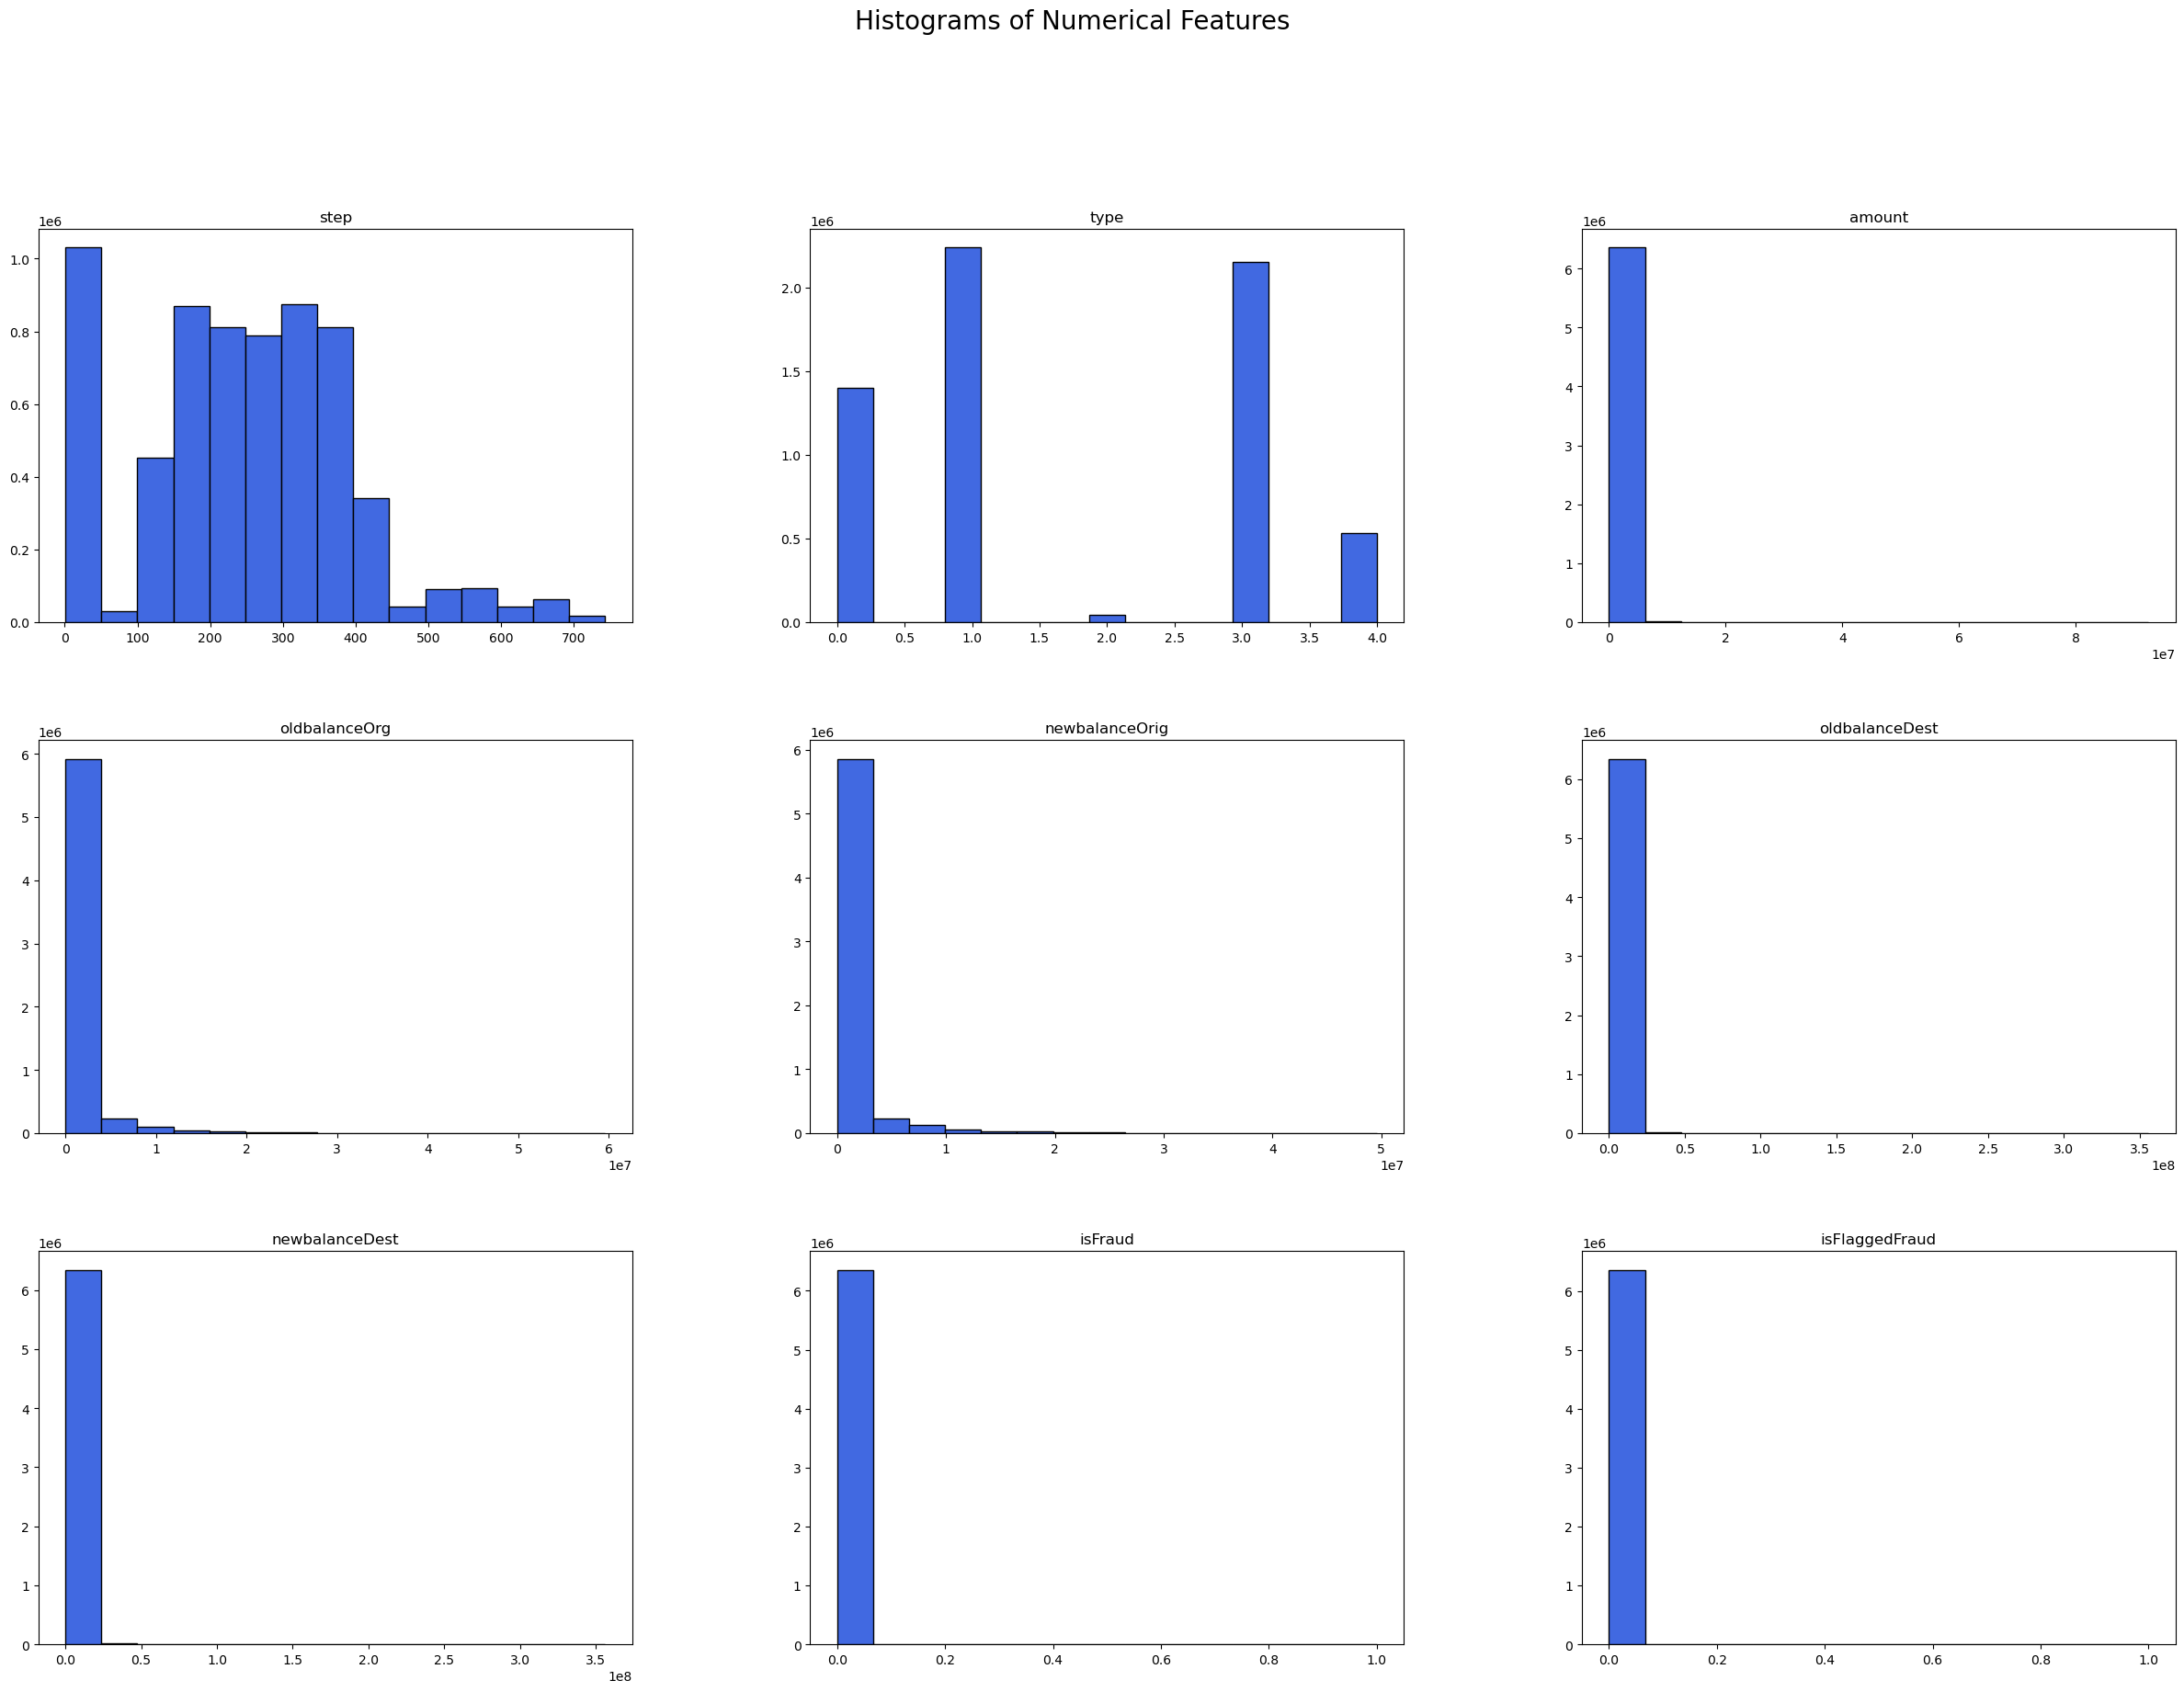

In [14]:
# Visualizing dataset to gain insights (Histograms) to decide which columns need normal distribution
data.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of Numerical Features', x = 0.5, y = 1, size = 20)

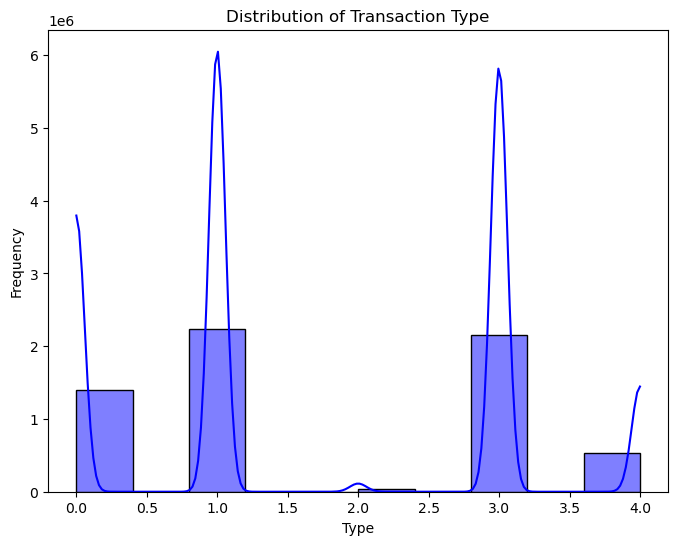

In [15]:
# Plotting the distribution of 'type'
plt.figure(figsize=(8, 6))

# Histogram showing the distribution of transaction type.
sns.histplot(data['type'], bins=10, kde=True, color='blue')
plt.title('Distribution of Transaction Type')
plt.xlabel('Type')  # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

Value Counts:
 isFraud
0    6354407
1       8197
Name: count, dtype: int64


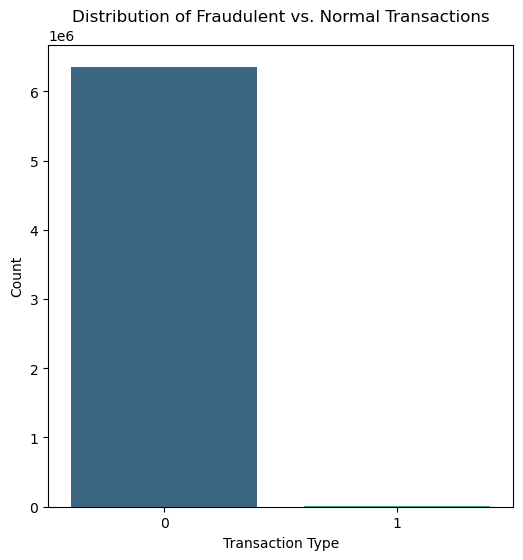

In [16]:
# Getting the value counts for the 'isFraud' variable
value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)

# Plotting a count plot to visualize the distribution of fraudulent vs. normal transactions
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions')  # 1 = Fraud, 0 = Normal
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()

Value Counts:
 type_catagory
CASH_OUT    2237484
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


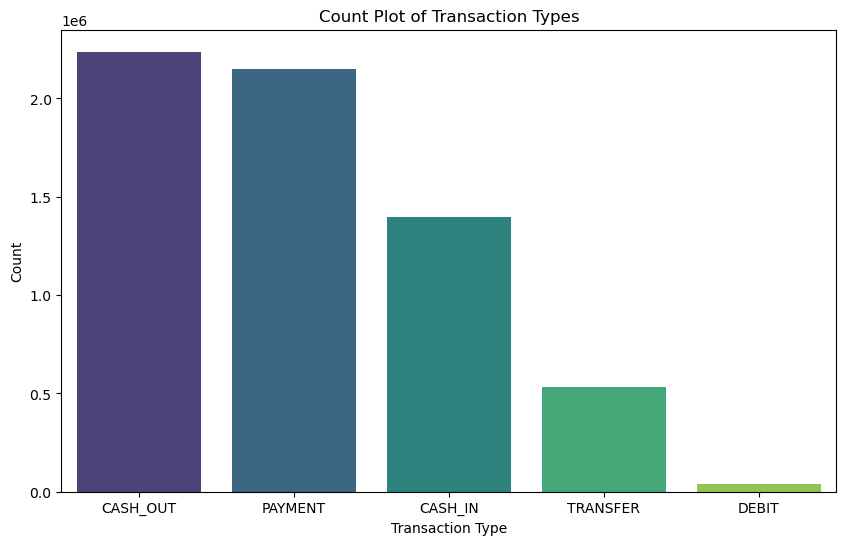

In [17]:
# Getting the value counts for the 'type' column to see the breakdown
value_counts = data['type_catagory'].value_counts()
print("Value Counts:\n", value_counts)

# Plotting a count plot to visualize transaction type popularity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type_catagory', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Count') # Y-axis label
plt.show()

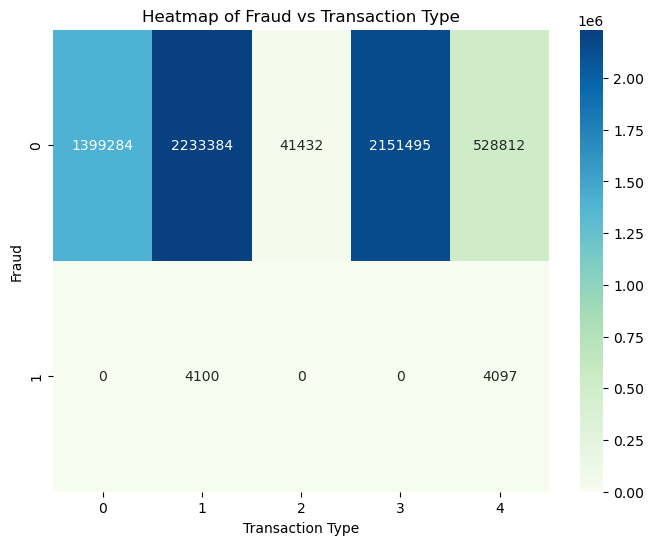

In [18]:
# Creating a pivot table where rows represent fraud, columns represent transaction type.
fraud_vs_type_matrix = pd.crosstab(data['isFraud'], data['type'])
plt.figure(figsize=(8, 6))

# A heatmap illustrating fraud against transaction type.
sns.heatmap(fraud_vs_type_matrix, annot=True, fmt="d", cmap='GnBu', cbar="False")
plt.title('Heatmap of Fraud vs Transaction Type')
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Fraud') # Y-axis label
plt.show()

In [19]:
# Listing of selected features to analyze
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

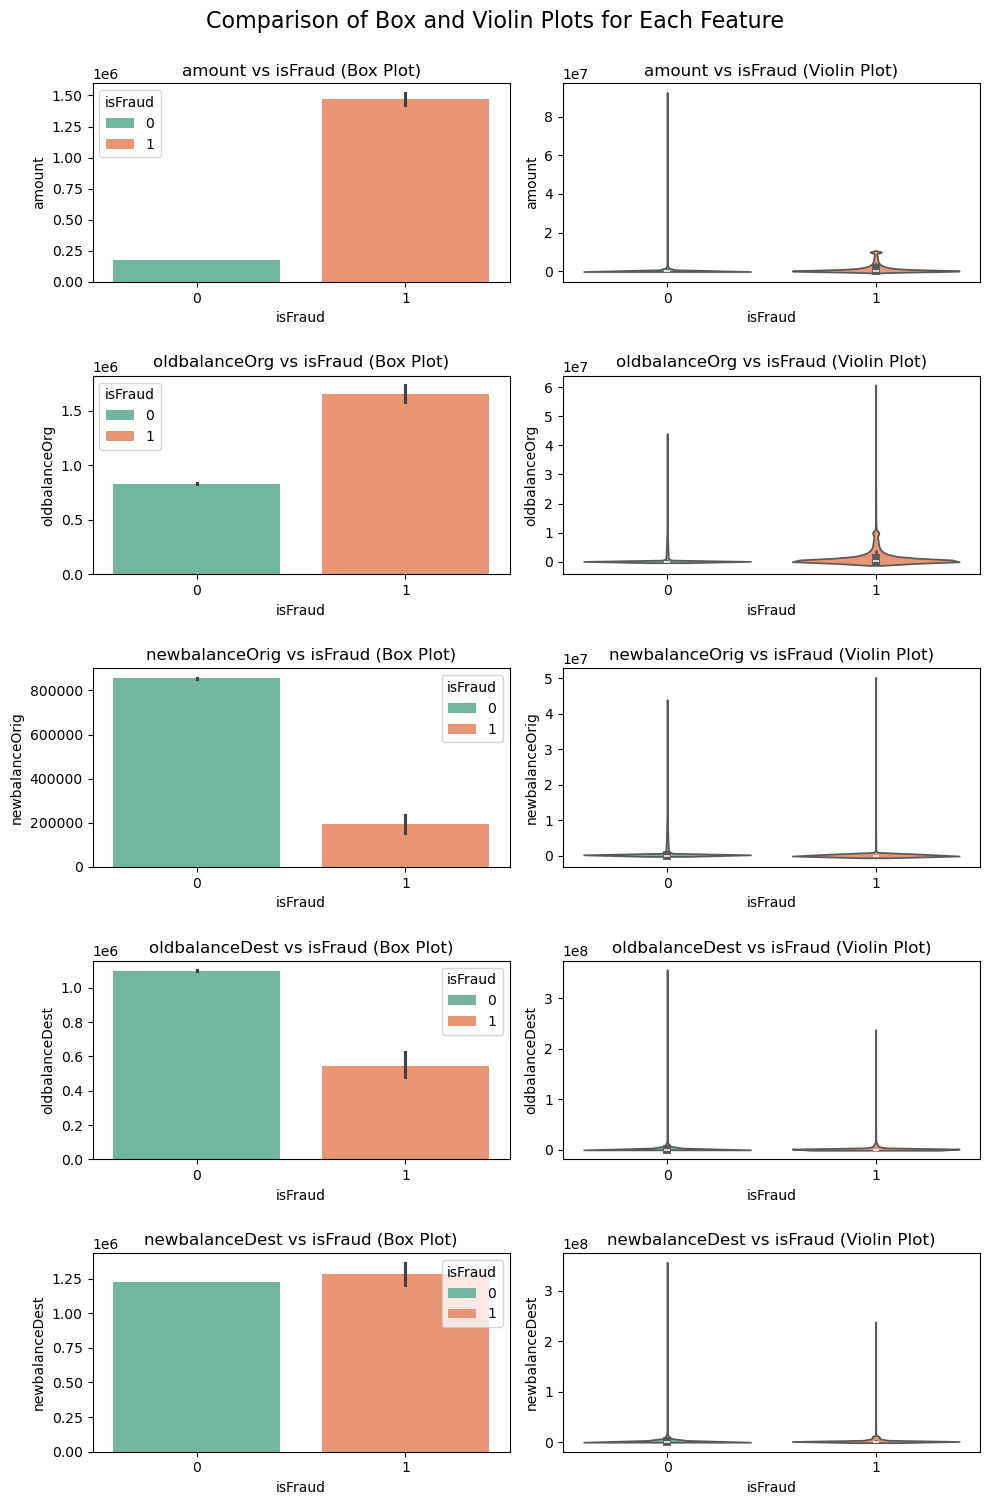

In [20]:
# Setting up the subplot grid
fig, axes = plt.subplots(len(selected_features), 2, figsize=(10, 15)) # Rows = features, Columns = 2 (box + violin)

# Looping through each feature and creating side-by-side plots
for i, feature in enumerate(selected_features):
    # Box plot (left)
    sns.barplot(x=data['isFraud'], y=data[feature], hue=data['isFraud'], ax=axes[i, 0], palette="Set2")
    axes[i, 0].set_title(f'{feature} vs isFraud (Box Plot)')
    axes[i, 0].set_xlabel('isFraud')
    axes[i, 0].set_ylabel(feature)

    # Violin plot (right)
    sns.violinplot(x=data['isFraud'], y=data[feature], ax=axes[i, 1], palette="Set2", inner='box')
    axes[i, 1].set_title(f'{feature} vs isFraud (Violin Plot)')
    axes[i, 1].set_xlabel('isFraud')
    axes[i, 1].set_ylabel(feature)

# Adding a main title and adjusting the layout
plt.suptitle("Comparison of Box and Violin Plots for Each Feature", fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

### Feature Engineering

In [22]:
# Defining weights for transaction types (using actual string labels)
transaction_type_weights = {
    'CASH_OUT': 2.0,
    'PAYMENT': 1.0,
    'CASH_IN': 1.0,
    'TRANSFER': 2.0,
    'DEBIT': 1.0
}

# Assigning weights to each row based on transaction type
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Reshaping to 2D array as required by scaler
scaler = MinMaxScaler()
data['transaction_type_weight_scaled'] = scaler.fit_transform(data[['transaction_type_weight']])


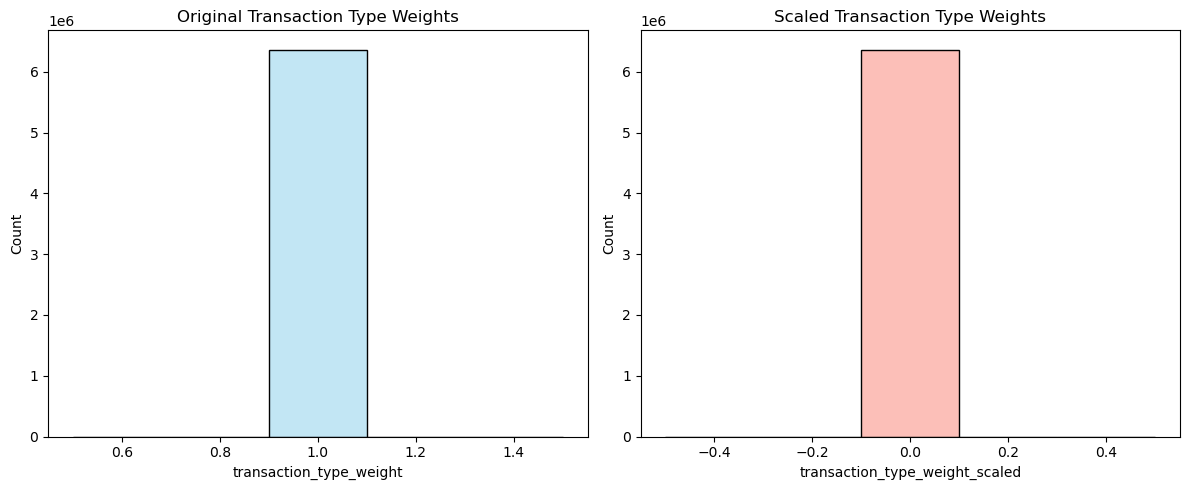

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original weights
sns.histplot(data['transaction_type_weight'], bins=5, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title("Original Transaction Type Weights")

# Scaled weights
sns.histplot(data['transaction_type_weight_scaled'], bins=5, ax=axes[1], kde=True, color='salmon')
axes[1].set_title("Scaled Transaction Type Weights")

plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [26]:
# Initializing MinMaxScaler
minmax_scaler = MinMaxScaler()

# Applying transformation to amount column
data['amount_scaled_minmax'] = minmax_scaler.fit_transform(data[['amount']])

# Initializing StandardScaler
standard_scaler = StandardScaler()

# Applying transformation to amount column
data['amount_scaled_standard'] = standard_scaler.fit_transform(data[['amount']])

# Initializing RobustScaler
robust_scaler = RobustScaler()
 
# Applying transformation to amount column
data['amount_scaled_robust'] = robust_scaler.fit_transform(data[['amount']])

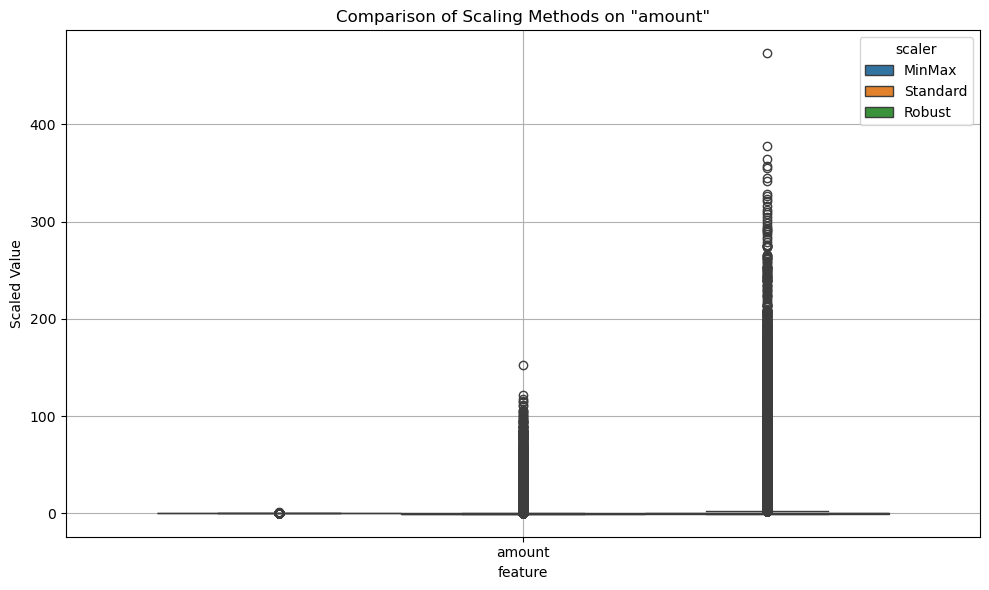

In [27]:
# Creating a DataFrame with the scaled values
scaled_df = pd.DataFrame({
    'amount_minmax': data['amount_scaled_minmax'],
    'amount_standard': data['amount_scaled_standard'],
    'amount_robust': data['amount_scaled_robust'],
    'scaler': ['MinMax'] * len(data) + ['Standard'] * len(data) + ['Robust'] * len(data),
    'value': pd.concat([
        data['amount_scaled_minmax'],
        data['amount_scaled_standard'],
        data['amount_scaled_robust']
    ], ignore_index=True)
})

# Melting for easier seaborn plotting
scaled_df['feature'] = 'amount' 

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='feature', y='value', hue='scaler', data=scaled_df)
plt.title('Comparison of Scaling Methods on "amount"')
plt.ylabel('Scaled Value')
plt.grid(True)
plt.tight_layout()
plt.show()

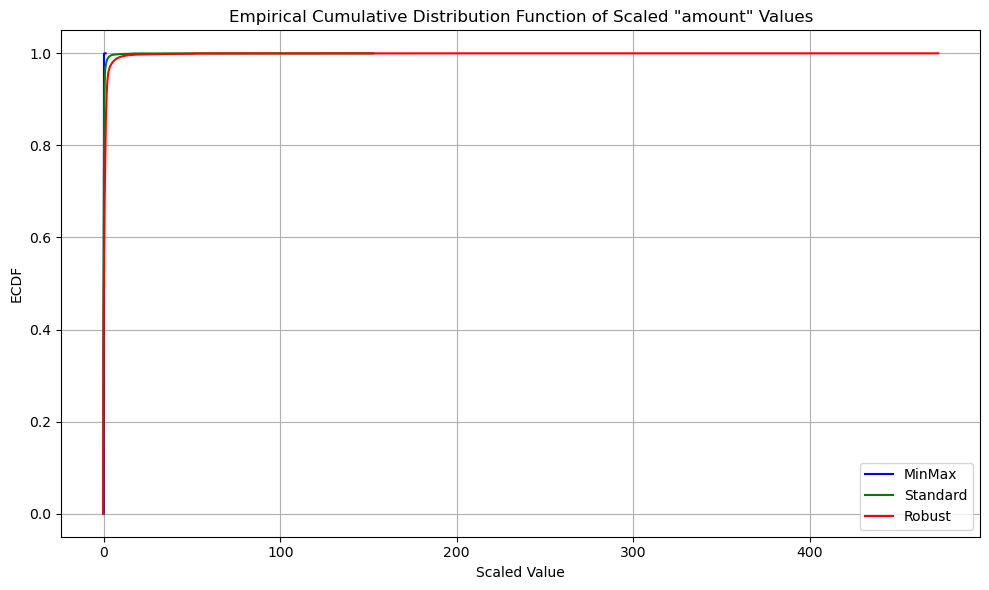

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

# Computing ECDFs
ecdf_minmax = ECDF(data['amount_scaled_minmax'])
ecdf_standard = ECDF(data['amount_scaled_standard'])
ecdf_robust = ECDF(data['amount_scaled_robust'])

plt.figure(figsize=(10, 6))
plt.plot(ecdf_minmax.x, ecdf_minmax.y, label='MinMax', color='blue')
plt.plot(ecdf_standard.x, ecdf_standard.y, label='Standard', color='green')
plt.plot(ecdf_robust.x, ecdf_robust.y, label='Robust', color='red')
plt.title('Empirical Cumulative Distribution Function of Scaled "amount" Values')
plt.xlabel('Scaled Value')
plt.ylabel('ECDF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Applying log transformation to prevent zero dominance
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])

In [30]:
# Preparing the columns and labels
scaled_features = {
    'amount_scaled_minmax': 'Amount (MinMax)',
    'amount_scaled_standard': 'Amount (Standard)',
    'amount_scaled_robust': 'Amount (Robust)',
    'oldbalanceOrg_log': 'Old Balance Orig (Log)',
    'newbalanceOrig_log': 'New Balance Orig (Log)',
    'oldbalanceDest_log': 'Old Balance Dest (Log)',
    'newbalanceDest_log': 'New Balance Dest (Log)'
}

# Collectting descriptive stats
stats_data = []

for col, label in scaled_features.items():
    stats = data[col].describe()
    stats_data.append({
        'Feature': label,
        'Mean': stats['mean'],
        'Std': stats['std'],
        'Min': stats['min'],
        'Max': stats['max']
    })

# Creating DataFrame
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Feature', inplace=True)

In [31]:
import plotly.express as px

# Resetting index for Plotly
stats_df_reset = stats_df.reset_index().melt(id_vars='Feature', var_name='Statistic', value_name='Value')

# Plotting interactive heatmap
fig = px.imshow(
    stats_df.T,
    text_auto='.2f',
    aspect='auto',
    color_continuous_scale='Viridis',
    title="Interactive Heatmap: Stats of Scaled & Transformed Features"
)
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Statistic",
    autosize=True,
    margin=dict(l=60, r=60, t=50, b=60),
)
fig.show()

In [32]:
# Define amount bins and labels
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']

# Bin the transaction amounts
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

In [33]:
# Grouping and aggregating
fraud_stats = data.groupby('amount_bin').agg(
    Total_Transactions=('isFraud', 'count'),
    Fraudulent_Transactions=('isFraud', 'sum'),
    Total_Amount=('amount', 'sum'),
    Fraud_Amount=('amount', lambda x: x[data.loc[x.index, 'isFraud'] == 1].sum()),
).reset_index()

# Calculating rates and proportions
fraud_stats['Fraud_Rate (%)'] = (fraud_stats['Fraudulent_Transactions'] / fraud_stats['Total_Transactions']) * 100
fraud_stats['Fraud_Amount_Proportion (%)'] = (fraud_stats['Fraud_Amount'] / fraud_stats['Total_Amount']) * 100

# Customing "Fraud Risk Index" — you can tweak the weights
fraud_stats['Fraud_Risk_Index'] = (
    0.5 * fraud_stats['Fraud_Rate (%)'] + 0.5 * fraud_stats['Fraud_Amount_Proportion (%)']
)

# Sorting by risk index
fraud_stats = fraud_stats.sort_values(by='Fraud_Risk_Index', ascending=False)

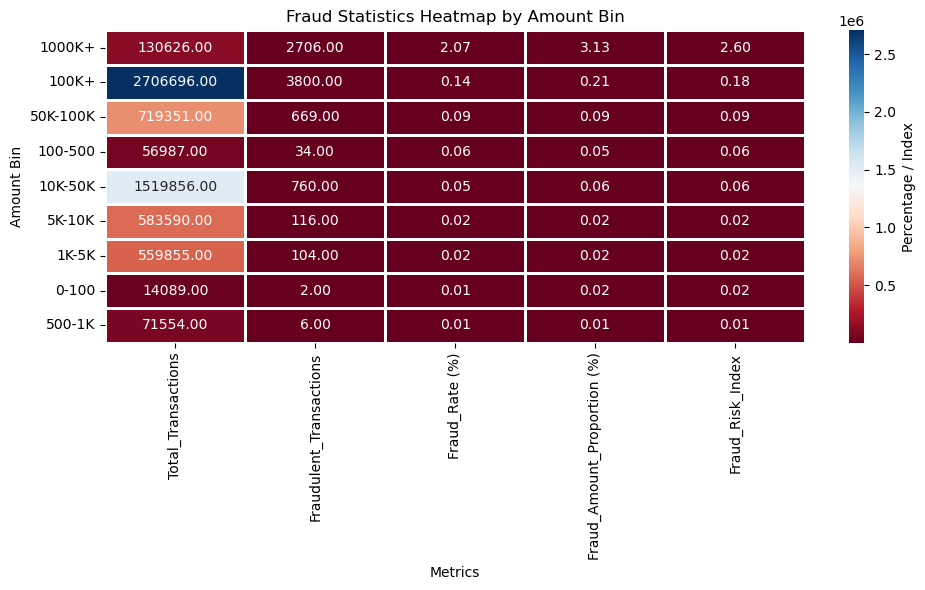

In [34]:
# Selecting relevant columns for the heatmap
fraud_stats_heatmap = fraud_stats[['Total_Transactions', 'Fraudulent_Transactions', 'Fraud_Rate (%)', 'Fraud_Amount_Proportion (%)', 'Fraud_Risk_Index']]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating the heatmap
sns.heatmap(fraud_stats_heatmap.set_index(fraud_stats['amount_bin']),
            annot=True,           # Annotate with actual values
            cmap='RdBu',        # Color map, you can change this for different colors
            fmt='.2f',            # Formatting the numbers to 2 decimal places
            linewidths=1,         # Line thickness between cells
            cbar_kws={'label': 'Percentage / Index'},  # Label for the color bar
            xticklabels=True,     # Show x-axis labels
            yticklabels=True)     # Show y-axis labels

# Title and labels
plt.title('Fraud Statistics Heatmap by Amount Bin')
plt.xlabel('Metrics')
plt.ylabel('Amount Bin')

# Showing the plot
plt.tight_layout()
plt.show()


In [35]:
# Creating an interactive plot
fig = px.bar(fraud_stats, x='Fraud_Risk_Index', y='amount_bin',
             title='Fraud Risk Index by Amount Bin',
             labels={'Fraud_Risk_Index': 'Fraud Risk Index', 'amount_bin': 'Amount Bin'},
             color='Fraud_Risk_Index', orientation='h')

# Showing the plot
fig.show()

In [36]:
# Defining weights for each transaction amount bin
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

# Assigning bin weights to the data DataFrame
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

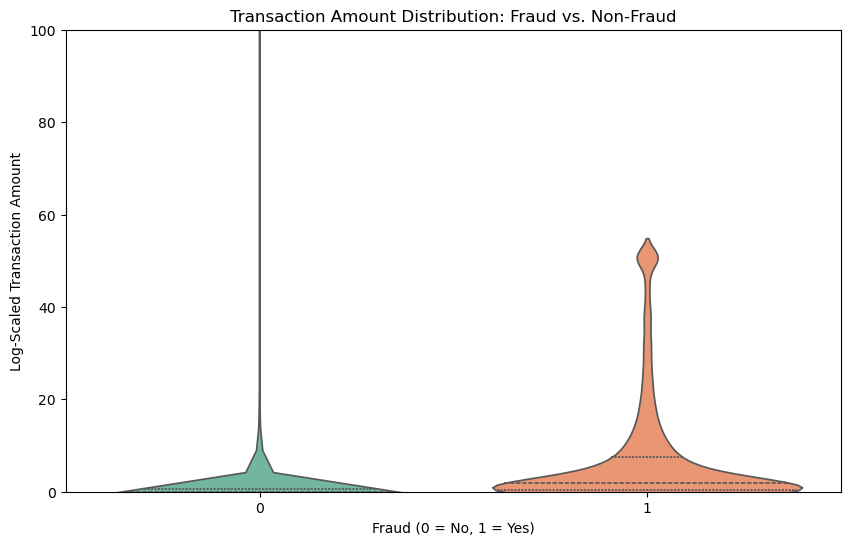

In [37]:
# Plotting transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount_scaled_robust', data=data, palette='Set2', inner='quartile')

plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Log-Scaled Transaction Amount")
plt.ylim(0, 100)
plt.show()

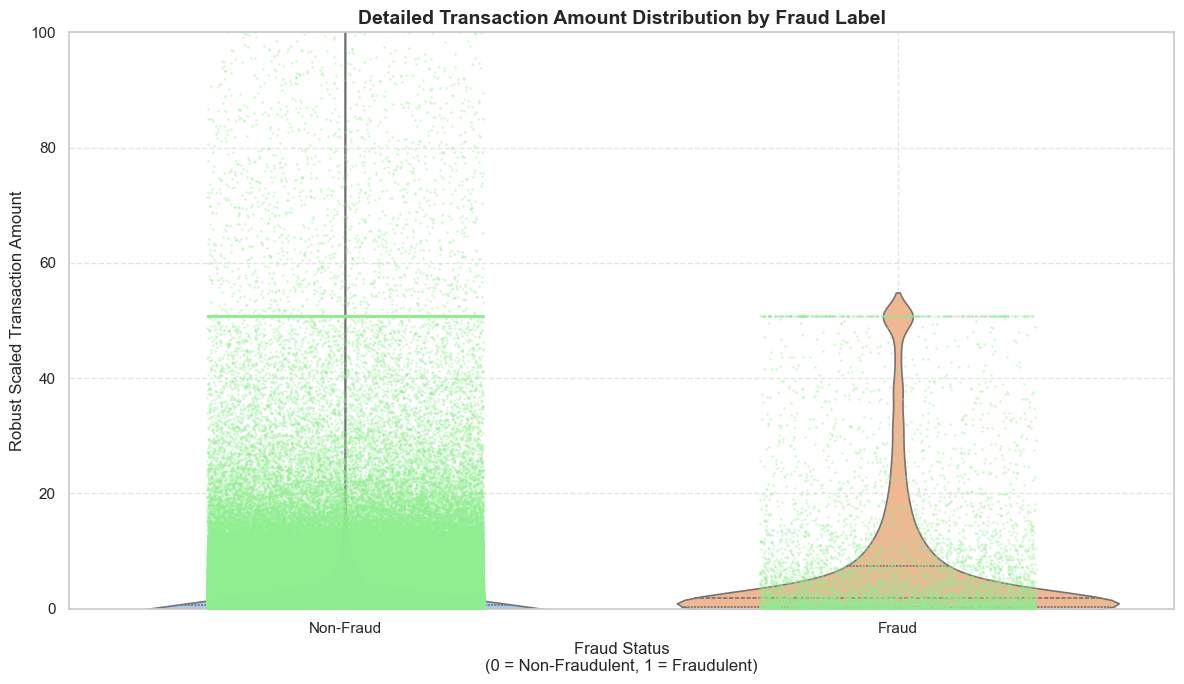

In [38]:
# Settinh the overall style
sns.set(style="whitegrid", context='notebook')

plt.figure(figsize=(12, 7))

# Violin plot showing distribution
sns.violinplot(
    x='isFraud',
    y='amount_scaled_robust',
    data=data,
    inner='quartile',
    linewidth=1.2,
    palette='pastel'
)

# Overlay strip plot to show data point distribution
sns.stripplot(
    x='isFraud',
    y='amount_scaled_robust',
    data=data,
    jitter=0.25,
    size=1.8,
    color='lightgreen',
    alpha=0.4
)

# Enhancing readability
plt.title("Detailed Transaction Amount Distribution by Fraud Label", fontsize=14, weight='bold')
plt.xlabel("Fraud Status\n(0 = Non-Fraudulent, 1 = Fraudulent)", fontsize=12)
plt.ylabel("Robust Scaled Transaction Amount", fontsize=12)
plt.xticks([0, 1], labels=["Non-Fraud", "Fraud"], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [39]:
# Combining weights
data['combined_weight'] = data['transaction_type_weight'] * data['bin_weight']

In [40]:
columns_to_impute = ['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']

In [41]:
from sklearn.impute import SimpleImputer
# Initializing SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Applying imputer to specific columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [42]:
data['Org_balance_diff'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['Dest_balance_diff']= data['oldbalanceDest'] - data['newbalanceDest']

In [43]:
data['Org_balance_diff_log'] = np.log1p(data['Org_balance_diff'])  # Log(x+1) for non-negative values
data['Dest_balance_diff_log'] = np.log1p(data['Dest_balance_diff'])

In [44]:
# Replacing infinite values with NaN to handle potential errors
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [45]:
# Defining columns to scale (only those that exist)
columns_to_scale = [
    'Org_balance_diff',
    'Dest_balance_diff',
    'Org_balance_diff_log',
    'Dest_balance_diff_log'
]

# Ensuring all columns exist before scaling
columns_to_scale = [col for col in columns_to_scale if col in data.columns]

# Initializing RobustScaler
scaler = RobustScaler()

# Applying scaling only to existing columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

### Data Visualization

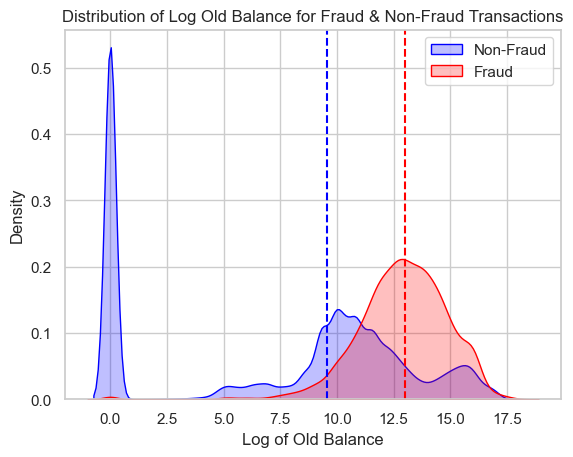

In [47]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceOrg_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceOrg_log', label='Fraud', fill=True, color='red')

plt.axvline(data[data['isFraud'] == 0]['oldbalanceOrg_log'].median(), color='blue', linestyle='--')
plt.axvline(data[data['isFraud'] == 1]['oldbalanceOrg_log'].median(), color='red', linestyle='--')

# Adding labels and title
plt.xlabel("Log of Old Balance")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()


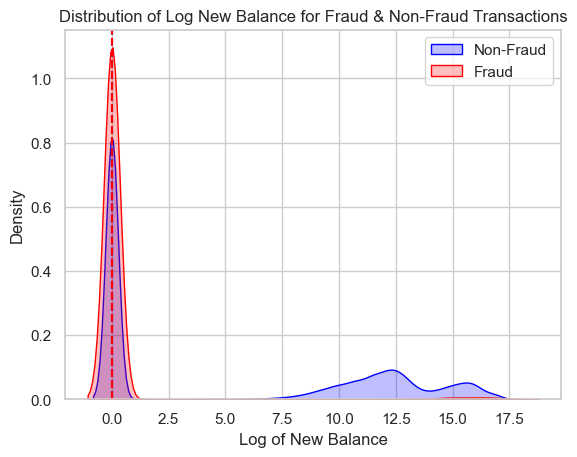

In [48]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceOrig_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceOrig_log', label='Fraud', fill=True, color='red')


plt.axvline(data[data['isFraud'] == 0]['newbalanceOrig_log'].median(), color='blue', linestyle='--')
plt.axvline(data[data['isFraud'] == 1]['newbalanceOrig_log'].median(), color='red', linestyle='--')

# Adding labels and title
plt.xlabel("Log of New Balance")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

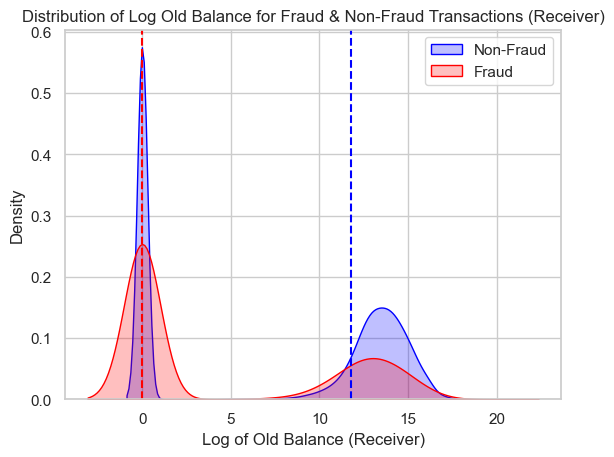

In [49]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceDest_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceDest_log', label='Fraud', fill=True, color='red')

plt.axvline(data[data['isFraud'] == 0]['oldbalanceDest_log'].median(), color='blue', linestyle='--')
plt.axvline(data[data['isFraud'] == 1]['oldbalanceDest_log'].median(), color='red', linestyle='--')

# Adding labels and title
plt.xlabel("Log of Old Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

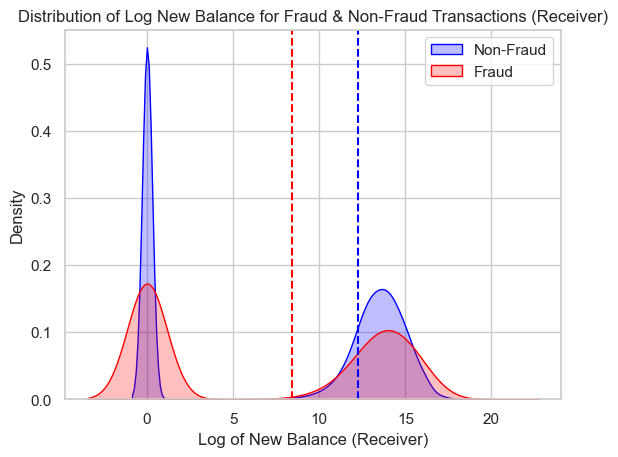

In [50]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceDest_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceDest_log', label='Fraud', fill=True, color='red')

plt.axvline(data[data['isFraud'] == 0]['newbalanceDest_log'].median(), color='blue', linestyle='--')
plt.axvline(data[data['isFraud'] == 1]['newbalanceDest_log'].median(), color='red', linestyle='--')

# Adding labels and title
plt.xlabel("Log of New Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

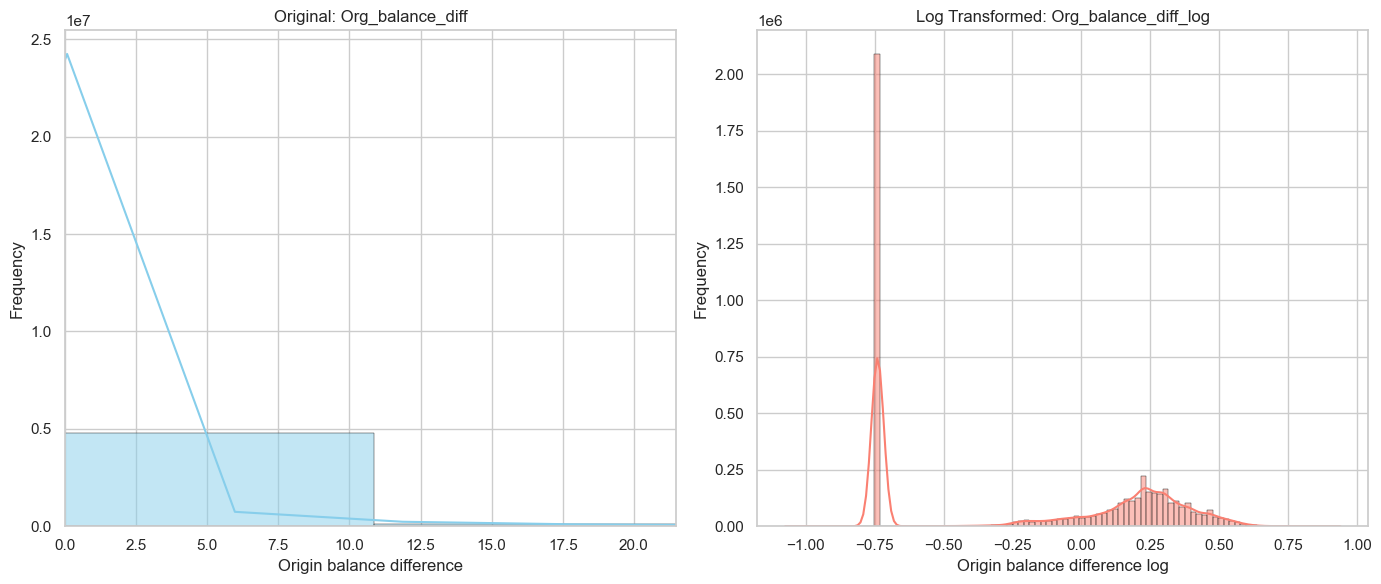

In [51]:
# Setting the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# ---------- Original Balance Difference ----------
plt.subplot(1, 2, 1)
sns.histplot(data['Org_balance_diff'], bins=100, kde=True, color='skyblue', edgecolor='k')
plt.title('Original: Org_balance_diff')
plt.xlabel('Origin balance difference')
plt.ylabel('Frequency')
plt.xlim(0, data['Org_balance_diff'].quantile(0.99))  # Limit for better view

# ---------- Log-Transformed Balance Difference ----------
plt.subplot(1, 2, 2)
sns.histplot(data['Org_balance_diff_log'], bins=100, kde=True, color='salmon', edgecolor='k')
plt.title('Log Transformed: Org_balance_diff_log')
plt.xlabel('Origin balance difference log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

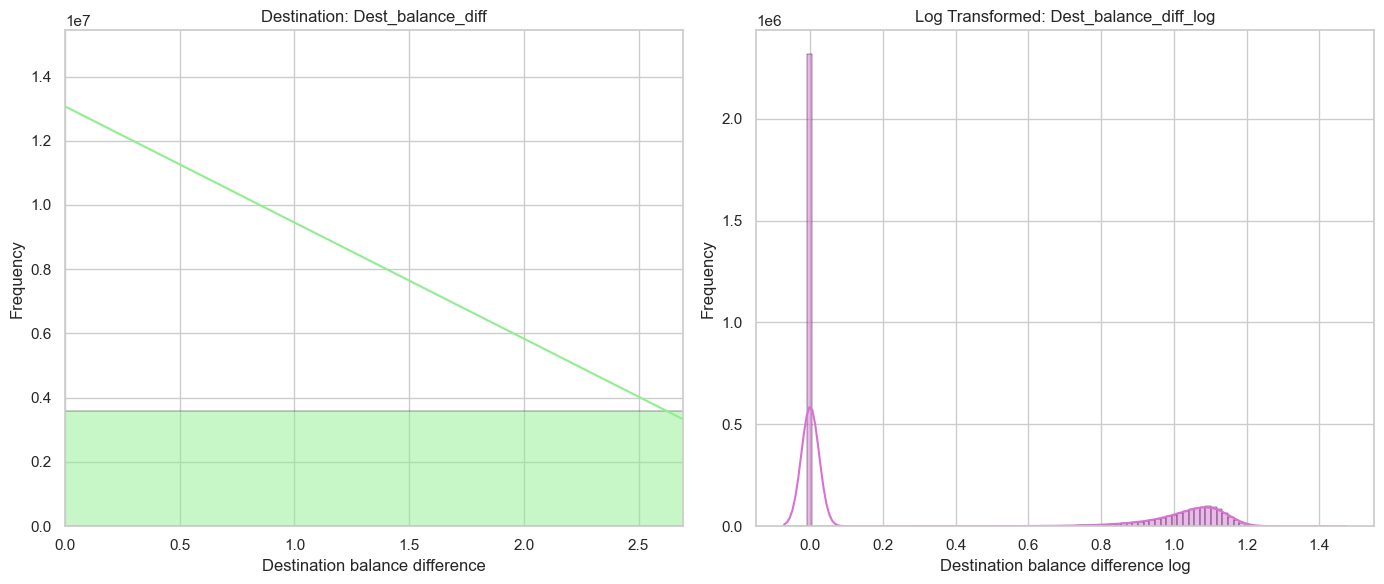

In [52]:
# Setting the plot size
plt.figure(figsize=(14, 6))

# ---------- Destination Balance Difference ----------
plt.subplot(1, 2, 1)
sns.histplot(data['Dest_balance_diff'], bins=100, kde=True, color='lightgreen', edgecolor='k')
plt.title('Destination: Dest_balance_diff')
plt.xlabel('Destination balance difference')
plt.ylabel('Frequency')
plt.xlim(0, data['Dest_balance_diff'].quantile(0.99))

# ---------- Log-Transformed Balance Difference ----------
plt.subplot(1, 2, 2)
sns.histplot(data['Dest_balance_diff_log'], bins=100, kde=True, color='orchid', edgecolor='k')
plt.title('Log Transformed: Dest_balance_diff_log')
plt.xlabel('Destination balance difference log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

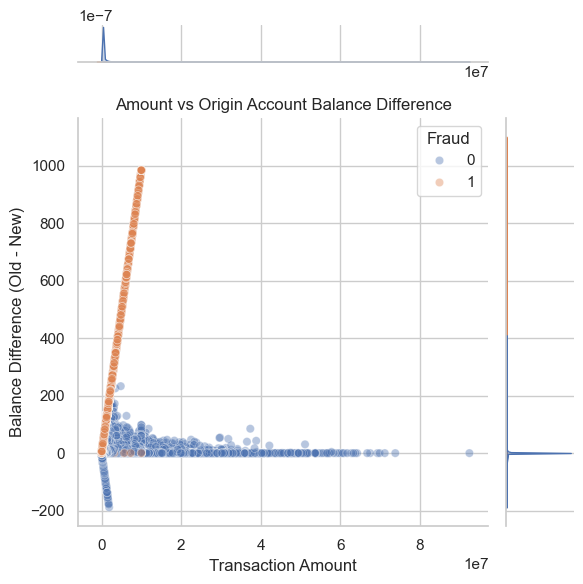

In [53]:
# Join plot of Amount vs Origin Account Balance Difference
plt.figure(figsize=(8, 5))
sns.jointplot(
    data=data, 
    x='amount', 
    y='Org_balance_diff', 
    hue='isFraud', 
    kind='scatter',
    alpha=0.4
)
# Adding titles and labels
plt.title('Amount vs Origin Account Balance Difference')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.legend(title='Fraud')
plt.grid(True)
plt.tight_layout()
plt.show()

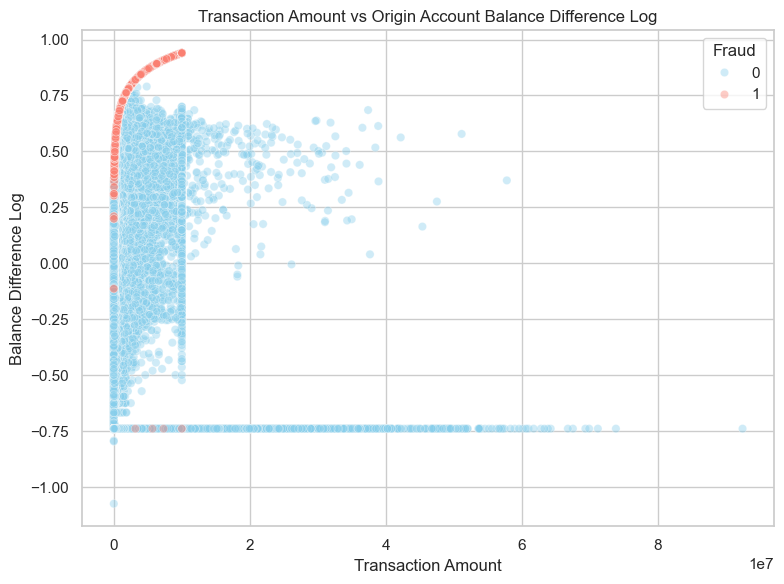

In [54]:
# Scatter plot of Amount vs Origin Account Balance Difference Log
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['amount'], 
    y=data['Org_balance_diff_log'], 
    hue='isFraud', 
    data=data, 
    alpha=0.4,
    palette={0: 'skyblue', 1: 'salmon'}
)
# Adding titles and labels
plt.title('Transaction Amount vs Origin Account Balance Difference Log')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference Log')
plt.legend(title='Fraud')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

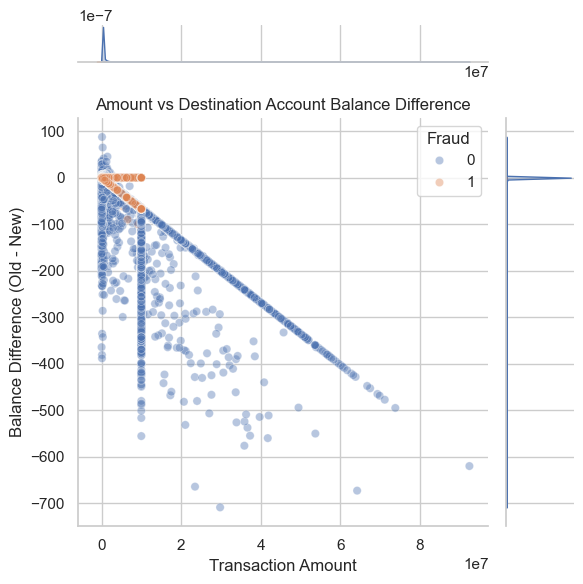

In [55]:
# Join plot of Amount vs Destination Account Balance Difference
plt.figure(figsize=(8, 5))
sns.jointplot(
    data=data, 
    x='amount', 
    y='Dest_balance_diff', 
    hue='isFraud', 
    kind='scatter',
    alpha=0.4
)
# Add titles and labels
plt.title('Amount vs Destination Account Balance Difference')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference (Old - New)')
plt.legend(title='Fraud')
plt.grid(True)
plt.tight_layout()
plt.show()

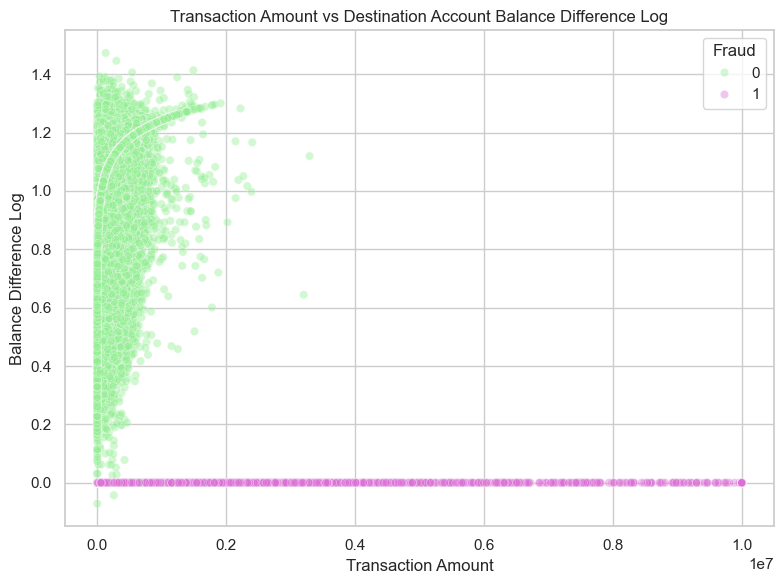

In [56]:
# Scatter plot of Amount vs Destination Account Balance Difference Log
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['amount'], 
    y=data['Dest_balance_diff_log'], 
    hue='isFraud', 
    data=data, 
    alpha=0.4,
    palette={0: 'lightgreen', 1: 'orchid'}
)
# Add titles and labels
plt.title('Transaction Amount vs Destination Account Balance Difference Log')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Difference Log')
plt.legend(title='Fraud')
plt.grid(True)
plt.tight_layout()
plt.show()

### Feature Selection

In [58]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_catagory', 'transaction_type_weight',
       'transaction_type_weight_scaled', 'amount_scaled_minmax',
       'amount_scaled_standard', 'amount_scaled_robust', 'oldbalanceOrg_log',
       'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log',
       'amount_bin', 'bin_weight', 'combined_weight', 'Org_balance_diff',
       'Dest_balance_diff', 'Org_balance_diff_log', 'Dest_balance_diff_log'],
      dtype='object')

In [59]:
# Display the first few rows of scaled data
data.head()

step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     3   9839.64  C1231006815       170136.0       160296.36   
1     1     3   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     3  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  ...  \
0  M1979787155             0.0             0.0        0  ...   
1  M2044282225             0.0             0.0        0  ...   
2   C553264065             0.0             0.0        1  ...   
3    C38997010         21182.0             0.0        1  ...   
4  M1230701703             0.0             0.0        0  ...   

   newbalanceOrig_log oldbalanceDest_log  newbalanceDest_log  amount_bin  \
0           11.984786           0.000000                 0.0      5K-10K   
1            9.872292           0.000000                 0.0       1K-5K   
2            0.000000           0.000000                 0.0     100-500   
3            0.000000           9.960954                 0.0     100-500   
4           10.305174           0.000000                 0.0     10K-50K   

   bin_weight  combined_weight  Org_balance_diff  Dest_balance_diff  \
0         1.0              1.0          0.969372            0.00000   
1         1.0              1.0          0.183663            0.00000   
2         1.0              1.0          0.017832            0.00000   
3         1.0              1.0          0.017832            0.14206   
4         1.0              1.0          1.149510            0.00000   

   Org_balance_diff_log  Dest_balance_diff_log  
0              0.218701               0.000000  
1              0.045421               0.000000  
2             -0.197046               0.000000  
3             -0.197046               0.895468  
4              0.236457               0.000000  

[5 rows x 28 columns]

In [60]:
selected_features = ['type', 'amount_scaled_robust', 'combined_weight', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 
                     'newbalanceDest_log', 'Org_balance_diff', 'Dest_balance_diff', 'Org_balance_diff_log', 'Dest_balance_diff_log', 'isFraud']

df = pd.DataFrame()
df = data[selected_features]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362604 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   type                   int32  
 1   amount_scaled_robust   float64
 2   combined_weight        float64
 3   oldbalanceOrg_log      float64
 4   newbalanceOrig_log     float64
 5   oldbalanceDest_log     float64
 6   newbalanceDest_log     float64
 7   Org_balance_diff       float64
 8   Dest_balance_diff      float64
 9   Org_balance_diff_log   float64
 10  Dest_balance_diff_log  float64
 11  isFraud                int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 735.8 MB


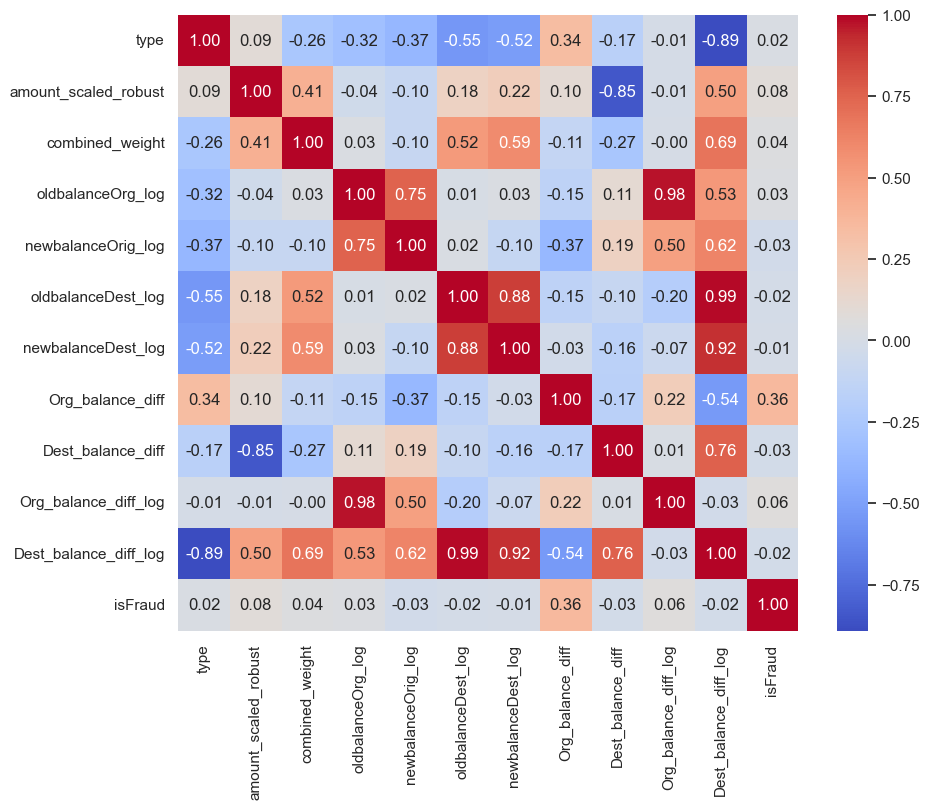

In [61]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [62]:
df.to_csv('clean_credit_card_fraud_dataset.csv', index=False)

df

type  amount_scaled_robust  combined_weight  oldbalanceOrg_log  \
0           3             -0.332937              1.0          12.044359   
1           3             -0.373767              1.0           9.964112   
2           4             -0.382384              1.0           5.204007   
3           1             -0.382384              1.0           5.204007   
4           3             -0.323576              1.0          10.634773   
...       ...                   ...              ...                ...   
6362615     1              1.355688              1.5          12.735768   
6362616     4             31.927868              2.0          15.657870   
6362617     1             31.927868              2.0          15.657870   
6362618     4              3.968266              1.5          13.652996   
6362619     1              3.968266              1.5          13.652996   

         newbalanceOrig_log  oldbalanceDest_log  newbalanceDest_log  \
0                 11.984786            0.000000            0.000000   
1                  9.872292            0.000000            0.000000   
2                  0.000000            0.000000            0.000000   
3                  0.000000            9.960954            0.000000   
4                 10.305174            0.000000            0.000000   
...                     ...                 ...                 ...   
6362615            0.000000            0.000000           12.735768   
6362616            0.000000            0.000000            0.000000   
6362617            0.000000           11.134441           15.668663   
6362618            0.000000            0.000000            0.000000   
6362619            0.000000           15.688865           15.811584   

         Org_balance_diff  Dest_balance_diff  Org_balance_diff_log  \
0                0.969372           0.000000              0.218701   
1                0.183663           0.000000              0.045421   
2                0.017832           0.000000             -0.197046   
3                0.017832           0.142060             -0.197046   
4                1.149510           0.000000              0.236457   
...                   ...                ...                   ...   
6362615         33.464464          -2.278125              0.587689   
6362616        621.781102           0.000000              0.892143   
6362617        621.781102         -42.328335              0.892143   
6362618         83.739697           0.000000              0.683255   
6362619         83.739697          -5.700659              0.683255   

         Dest_balance_diff_log  isFraud  
0                     0.000000        0  
1                     0.000000        0  
2                     0.000000        1  
3                     0.895468        1  
4                     0.000000        0  
...                        ...      ...  
6362615                    NaN        1  
6362616               0.000000        1  
6362617                    NaN        1  
6362618               0.000000        1  
6362619                    NaN        1  

[6362604 rows x 12 columns]

### Model Evalution

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = df.drop(columns=['isFraud'])  
y = df['isFraud'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) on the validation set
mse_RF = mean_squared_error(y_test, y_pred_RF)
print("Validation MSE:", mse_RF)
# Calculate the Root Mean Squared Error (RMSE) on the validation set
rmse_RF = mean_squared_error(y_test, y_pred_RF, squared=False)
print("Validation RMSE:", rmse_RF)

Validation MSE: 0.00022789407797592338
Validation RMSE: 0.01509616103437968


In [67]:
# Evaluate the model
accuracy_RF = accuracy_score(y_test, y_pred_RF)  # Calculate accuracy
report_RF = classification_report(y_test, y_pred_RF)  # Generate classification report
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)  # Generate confusion matrix

# Print results
print(f" Accuracy: {accuracy_RF:.4f}")
print("\n Classification Report:\n", report_RF)
print("\n Confusion Matrix:\n", conf_matrix_RF)

 Accuracy: 0.9998

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270934
           1       0.96      0.85      0.90      1587

    accuracy                           1.00   1272521
   macro avg       0.98      0.92      0.95   1272521
weighted avg       1.00      1.00      1.00   1272521


 Confusion Matrix:
 [[1270882      52]
 [    238    1349]]


In [69]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)

In [71]:
# Calculate the Mean Squared Error (MSE) on the validation set
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
print("Validation MSE:", mse_XGB)
# Calculate the Root Mean Squared Error (RMSE) on the validation set
rmse_XGB = mean_squared_error(y_test, y_pred_XGB, squared=False)
print("Validation RMSE:", rmse_XGB)

Validation MSE: 0.0006632503510747563
Validation RMSE: 0.025753647335372835


In [73]:
# Evaluate the model
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)  # Calculate accuracy
report_XGB = classification_report(y_test, y_pred_XGB)  # Generate classification report
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)  # Generate confusion matrix

# Print results
print(f" Accuracy: {accuracy_XGB:.4f}")
print("\n Classification Report:\n", report_XGB)
print("\n Confusion Matrix:\n", conf_matrix_XGB)

 Accuracy: 0.9993

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270934
           1       0.75      0.71      0.73      1587

    accuracy                           1.00   1272521
   macro avg       0.87      0.85      0.86   1272521
weighted avg       1.00      1.00      1.00   1272521


 Confusion Matrix:
 [[1270552     382]
 [    462    1125]]


In [81]:
from lightgbm import LGBMClassifier

model_LGB = LGBMClassifier(random_state=42)
model_LGB.fit(X_train, y_train)
y_pred_LGB = model_LGB.predict(X_test)

[LightGBM] [Info] Number of positive: 6610, number of negative: 5083473
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 5090083, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001299 -> initscore=-6.645166
[LightGBM] [Info] Start training from score -6.645166


In [82]:
# Calculate the Mean Squared Error (MSE) on the validation set
mse_LGB = mean_squared_error(y_test, y_pred_LGB)
print("Validation MSE:", mse_LGB)
# Calculate the Root Mean Squared Error (RMSE) on the validation set
rmse_LGB = mean_squared_error(y_test, y_pred_LGB, squared=False)
print("Validation RMSE:", rmse_LGB)

Validation MSE: 0.0017791454915085882
Validation RMSE: 0.04217991810694502


In [83]:
# Evaluate the model
accuracy_LGB = accuracy_score(y_test, y_pred_LGB)  # Calculate accuracy
report_LGB = classification_report(y_test, y_pred_LGB)  # Generate classification report
conf_matrix_LGB = confusion_matrix(y_test, y_pred_LGB)  # Generate confusion matrix

# Print results
print(f" Accuracy: {accuracy_LGB:.4f}")
print("\n Classification Report:\n", report_LGB)
print("\n Confusion Matrix:\n", conf_matrix_LGB)

 Accuracy: 0.9982

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270934
           1       0.18      0.12      0.14      1587

    accuracy                           1.00   1272521
   macro avg       0.59      0.56      0.57   1272521
weighted avg       1.00      1.00      1.00   1272521


 Confusion Matrix:
 [[1270074     860]
 [   1404     183]]


In [84]:
from sklearn.linear_model import SGDClassifier

# Define a faster model (SGDClassifier with log loss for logistic regression)
model_SGD = SGDClassifier(
    loss='log_loss',  # Equivalent to logistic regression
    penalty='l1',  # L1 regularization for feature selection
    alpha=0.0001,  # Regularization strength
    max_iter=1000,  # Maximum iterations
    tol=1e-3,  # Tolerance for stopping
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all CPU cores for faster training
)

model_SGD.fit(X_train, y_train)
y_pred_SGD = model_SGD.predict(X_test)

ValueError: Input X contains NaN.
SGDClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

# Create pipeline to handle imputation + model
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # or 'mean', 'most_frequent'
    SGDClassifier(
        loss='log_loss',
        penalty='l1',
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        n_jobs=-1
    )
)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred_SGD = pipeline.predict(X_test)


In [90]:
# Calculate the Mean Squared Error (MSE) on the validation set
mse_SGD = mean_squared_error(y_test, y_pred_SGD)
print("Validation MSE:", mse_SGD)
# Calculate the Root Mean Squared Error (RMSE) on the validation set
rmse_SGD = mean_squared_error(y_test, y_pred_SGD, squared=False)
print("Validation RMSE:", rmse_SGD)

Validation MSE: 0.001056957016819369
Validation RMSE: 0.03251087536224408


In [92]:
# Evaluate the model
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)  # Calculate accuracy
report_SGD = classification_report(y_test, y_pred_SGD)  # Generate classification report
conf_matrix_SGD = confusion_matrix(y_test, y_pred_SGD)  # Generate confusion matrix

# Print results
print(f" Accuracy: {accuracy_SGD:.4f}")
print("\n Classification Report:\n", report_SGD)
print("\n Confusion Matrix:\n", conf_matrix_SGD)

 Accuracy: 0.9989

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270934
           1       0.57      0.62      0.59      1587

    accuracy                           1.00   1272521
   macro avg       0.78      0.81      0.80   1272521
weighted avg       1.00      1.00      1.00   1272521


 Confusion Matrix:
 [[1270189     745]
 [    600     987]]


In [79]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Downsample the majority class to reduce dataset size (optional, adjust sampling_strategy)
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Keep 10% of the majority class
X_under, y_under = rus.fit_resample(X, y)

In [ ]:
# Apply SMOTE to balance classes (optimized with k_neighbors=1 for speed)
smote = SMOTE(sampling_strategy=0.5, k_neighbors=1, random_state=42)  # Balance classes
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Separate 'combined_weight' from the features
combined_weight_resampled = X_resampled['combined_weight']  # Extract sample weights
X_resampled = X_resampled.drop(columns=['combined_weight'])  # Drop weights from features

# Convert to NumPy arrays for faster processing
X_resampled, y_resampled = X_resampled.values, y_resampled.values

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_resampled, y_resampled, combined_weight_resampled,
    test_size=0.2,  # 20% for testing
    stratify=y_resampled,  # Preserve class balance
    random_state=42  # For reproducibility
)